# Analyze Categories of the Data with Groupby

- Use [this CheatSheet](https://www.craft.do/s/G80r1dqrQKrjTb/b/6FC991B6-1161-4F88-A315-3E84528A1950/groupby()-Categorical-Columns-to-Sum) to work better with the following exercises.

## 1 Categorical & 1 Numerical

### Tips Dataset

In which `day` do people spend more `money` in the restaurant?

- Every row represents a table in the restaurant
- Every column represents characteristics of the tables

In [12]:
import seaborn as sns

df_tips = sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Data Manipulation

In [39]:
dff = df_tips.groupby('day', observed=False).total_bill.mean().sort_values().reset_index()
dff

,day,total_bill
0,Fri,17.151579
1,Thur,17.682742
2,Sat,20.441379
3,Sun,21.410000


#### Plot

In [14]:
import plotly.express as px

/home/codespace/.local/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



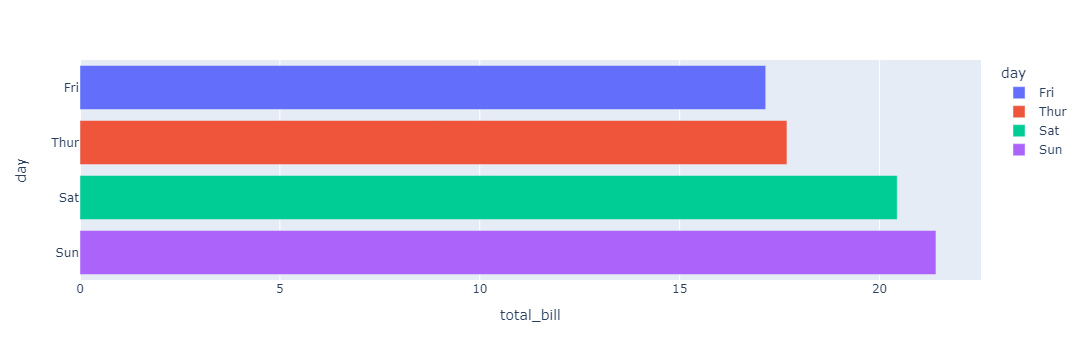

In [43]:
px.bar(data_frame=dff, y='day', x='total_bill',color='day')

### Titanic Dataset

Who was `older`: people who `survived`, or those who didn't?
- Every row represents a person in the titanic
- Every column represts characteristics of the people

In [18]:
df_titanic = sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Data Manipulation

In [19]:
dff = df_titanic.groupby('alive').age.mean().reset_index()
dff

,alive,age
0,no,30.626179
1,yes,28.343690


#### Plot

In [20]:
import plotly.express as px

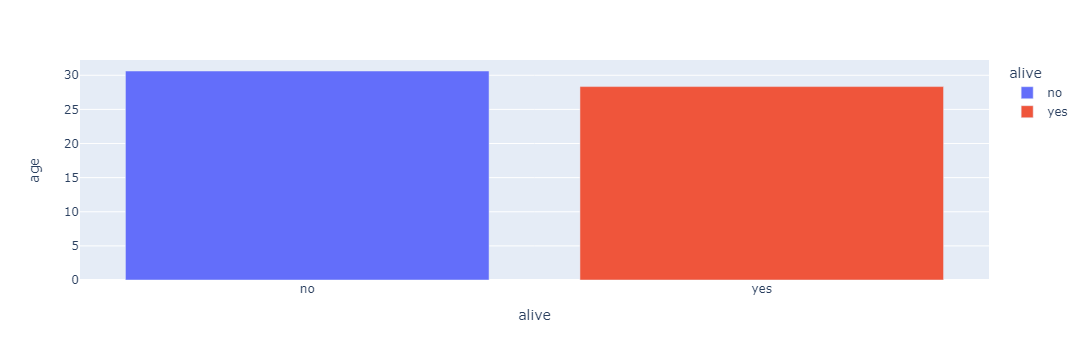

In [22]:
px.bar(data_frame=dff, x='alive', y='age', color='alive')

## 2 Categorical & 1 Numerical

### Tips Dataset

When do people spend more `money` in the restaurant based on the `day` and the `time`?

In [23]:
df_tips #!

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Data Manipulation

In [44]:
dff = df_tips.groupby(['day','time'],observed=False).total_bill.mean().sort_values().reset_index()
dff

,day,time,total_bill
0,Fri,Lunch,12.845714
1,Thur,Lunch,17.664754
2,Thur,Dinner,18.780000
3,Fri,Dinner,19.663333
4,Sat,Dinner,20.441379
5,Sun,Dinner,21.410000
6,Sat,Lunch,NaN
7,Sun,Lunch,NaN


#### Plot

In [31]:
import plotly.express as px

/home/codespace/.local/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



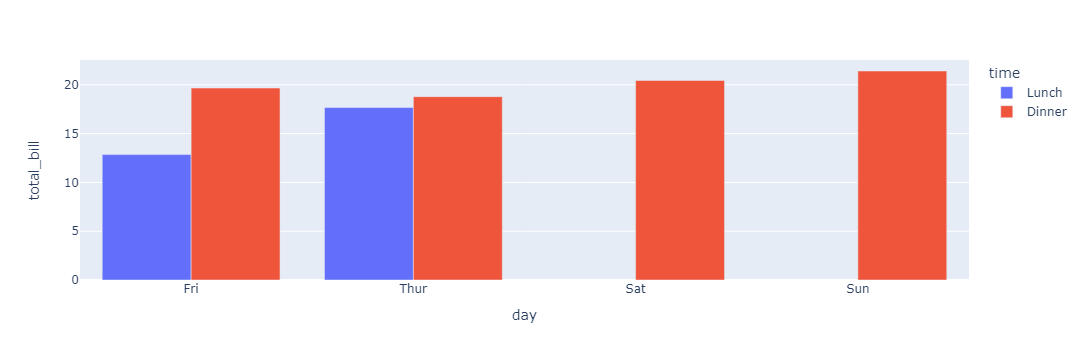

In [37]:
px.bar(data_frame=dff, x='day', y='total_bill', color='time', barmode='group')

### Titanic Dataset

Were `females` who survived `older` than males who `survived`?

In [38]:
df_titanic #!

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Data Manipulation

#### Plot

## 3 Categorical & 1 Numerical

### Tips Dataset

When do people give more `tip` in the restaurant based on the `day`, `time` and `sex`?

In [ ]:
df_tips #!

#### Data Manipulation

#### Plot

### Titanic Dataset

Were `females` who survived in first `class` `older` than males who `survived`?

In [ ]:
df_titanic #!

#### Data Manipulation

#### Plot

## 1 Categorical

This time, you need to count the `size()` based on the repetitions of each group within the column.

If you get lost, Google: "pandas dataframe count values in column"

### Tips Dataset

In which day of the week had the restaurant more tables occupied?

In [ ]:
df_tips #!

#### Data Manipulation

#### Plot

### Titanic Dataset

How many people did survive the Titanic?

In [ ]:
df_titanic

#### Data Manipulation

#### Plot